In [ ]:
library(tidyverse)
source("../R/scripts/local.R")
source("../R/functions/database.R")

area_data <- tbl(con, "area_data")
wa_fixed_data <- tbl(con, "wa_fixed_data")
county_info <- tbl(con, "county_info")

In [ ]:

county_info <- county_info %>% unique()
RPostgres::dbWriteTable(
    con,
    "county_info",
    county_info,
    overwrite = TRUE
)

In [ ]:
RPostgres::dbWriteTable(
    con,
    "area_data",
    area_data,
    overwrite = TRUE
)

In [ ]:
RPostgres::dbWriteTable(
    con,
    "wa_fixed_data",
    wa_fixed_data,
    overwrite = TRUE
)

In [ ]:
dbRemoveTable(con, "area_data")

In [ ]:
wa_fixed_data

In [ ]:
wa_fixed_data <- wa_fixed_data %>% inner_join(county_info, by = c("BlockCode" = "block_code")) %>% 
    data.frame()

In [ ]:
wa_fixed_data

In [ ]:
wa_fixed_data <- wa_fixed_data %>%
    select(
        LogRecNo,
        Provider_Id,
        FRN,
        ProviderName,
        DBAName,
        HoldingCompanyName,
        HocoNum,
        HocoFinal,
        StateAbbr,
        BlockCode,
        TechCode,
        Consumer,
        MaxAdDown,
        MaxAdUp,
        Business,
        county_id.x,
        county_name.x,
        tract.x
    ) %>%
    filter(
        county_name.x == "Adams County" |
        county_name.x == "Asotin County" |
        county_name.x == "Ferry County" |
        county_name.x == "Garfield County" |
        county_name.x == "Lincoln County" |
        county_name.x == "Pend Oreille County" |
        county_name.x == "Spokane County" |
        county_name.x == "Stevens County" |
        county_name.x == "Whitman County"
    ) %>%
    rename(
        log_rec_no = LogRecNo,
        provider_id = Provider_Id,
        frn = FRN,
        provider_name = ProviderName,
        dba_name = DBAName,
        holding_company_name = HoldingCompanyName,
        hoco_num = HocoNum,
        hoco_final = HocoFinal,
        state_abbr = StateAbbr,
        block_code = BlockCode,
        tech_code = TechCode,
        consumer = Consumer,
        max_ad_down = MaxAdDown,
        max_ad_up = MaxAdUp,
        business = Business,
        county_id = county_id.x,
        county_name = county_name.x,
        tract = tract.x
    ) %>% data.frame()

In [ ]:
wa_fixed_data %>%
    group_by(county_name.x) %>% 
    select(
        county_name.x
    )


In [ ]:
library(ggplot2)

In [ ]:
library(ggplot2)
library(tidyr)
library(tidyverse)
household_income_data <- read.csv("../data/Household_Income.csv")
ss_income_data <- read.csv("../data/Social_Security_Income.csv")
public_assistance_data <- read.csv("../data/Public_Assistance.csv")
naturalization_data <- read.csv("../data/B05011 PERIOD OF NATURALIZATION.csv")
nativity_data <- read.csv("../data/B05012 NATIVITY IN THE UNITED STATES.csv")
transportation_data <- read.csv("../data/B08101 MEANS OF TRANSPORTATION TO WORK BY AGE.csv")
poverty_data <- read.csv("../data/B17020 POVERTY STATUS IN THE PAST 12 MONTHS BY AGE.csv")
types_computer_data <- read.csv("../data/B28001 TYPES OF COMPUTERS IN HOUSEHOLD.csv")
presence_computer_data <- read.csv("../data/B28003 PRESENCE OF COMPUTER AND TYPE OF INTERNET SUBSCRIPTION IN HOUSEHOLD.csv")
internet_subscription_data <- read.csv("../data/B28003 PRESENCE OF COMPUTER AND TYPE OF INTERNET SUBSCRIPTION IN HOUSEHOLD.csv")
voting_age_data <- read.csv("../data/B29002 CITIZEN, VOTING-AGE POPULATION BY EDUCATIONAL ATTAINMENT.csv")
occupation_over_16_data <- read.csv("../data/OCCUPATION_BY_SEX_FOR_THE_FULL-TIME_YEAR-ROUND_CIVILIAN_EMPLOYED_POPULATION_16_YEARS_AND_OVER.csv")
type_computer_internet_sub_data <- read.csv("../data/TYPES_OF_COMPUTERS_AND_INTERNET_SUBSCRIPTIONS.csv")
type_internet_sub_characteristics <- read.csv("../data/TYPES_OF_INTERNET_SUBSCRIPTIONS_BY_SELECTED_CHARACTERISTICS.csv")

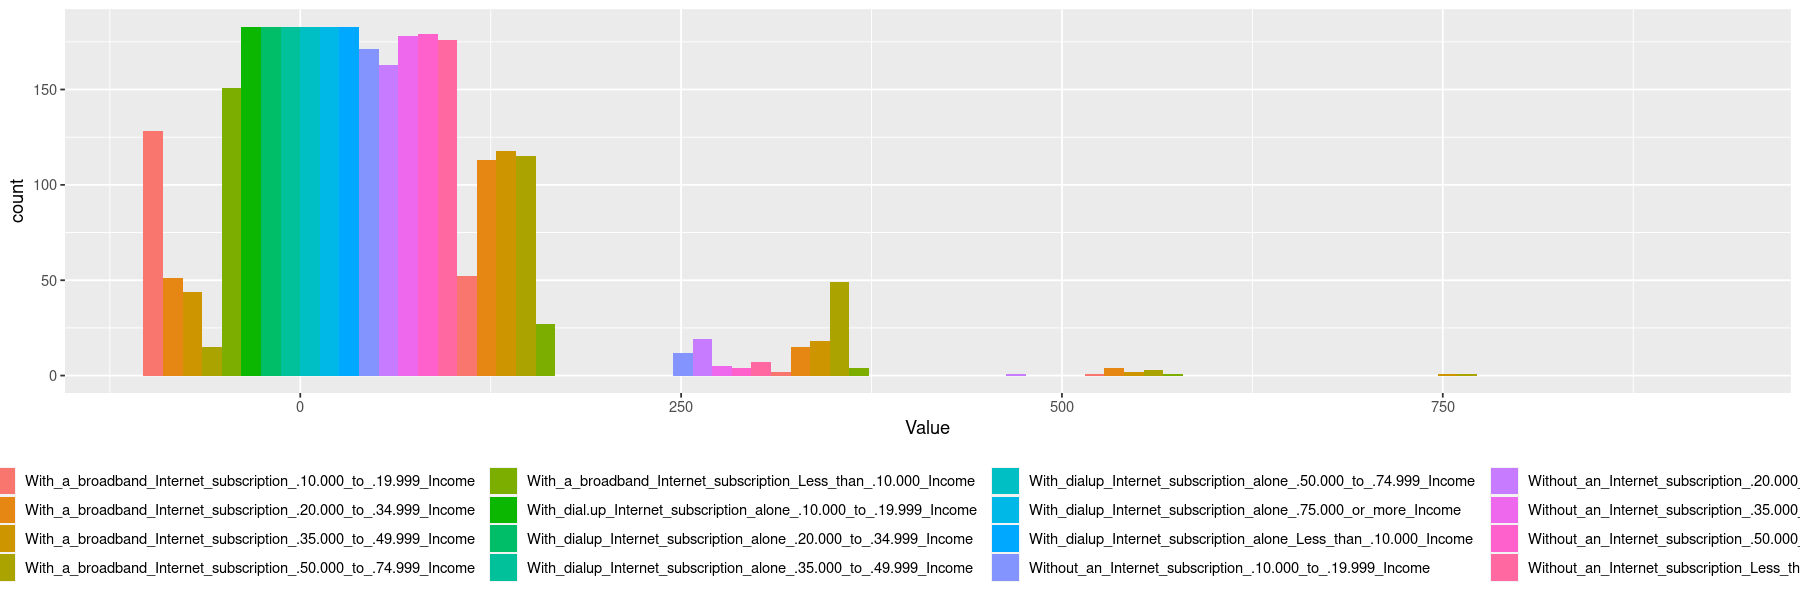

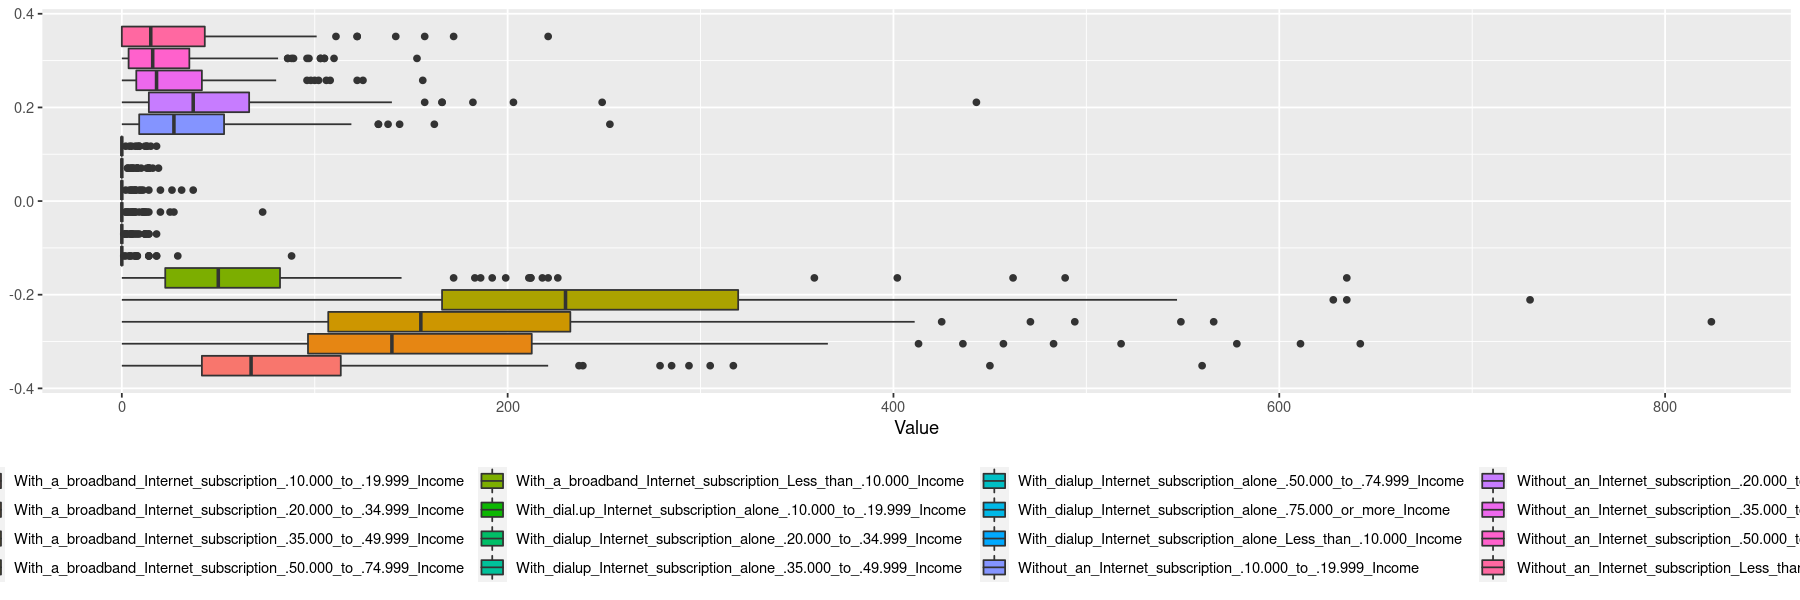

In [63]:
options(repr.plot.width = 15, repr.plot.height = 5)
household_income_data %>%
    select(
        With_dialup_Internet_subscription_alone_Less_than_.10.000_Income,
        With_a_broadband_Internet_subscription_Less_than_.10.000_Income,
        Without_an_Internet_subscription_Less_than_.10.000_Income,
        With_dial.up_Internet_subscription_alone_.10.000_to_.19.999_Income,
        With_a_broadband_Internet_subscription_.10.000_to_.19.999_Income,
        Without_an_Internet_subscription_.10.000_to_.19.999_Income,
        With_dialup_Internet_subscription_alone_.20.000_to_.34.999_Income,
        With_a_broadband_Internet_subscription_.20.000_to_.34.999_Income,
        Without_an_Internet_subscription_.20.000_to_.34.999_Income,
        With_dialup_Internet_subscription_alone_.35.000_to_.49.999_Income,
        With_a_broadband_Internet_subscription_.35.000_to_.49.999_Income,
        Without_an_Internet_subscription_.35.000_to_.49.999_Income,
        With_dialup_Internet_subscription_alone_.50.000_to_.74.999_Income,
        With_a_broadband_Internet_subscription_.50.000_to_.74.999_Income,
        Without_an_Internet_subscription_.50.000_to_.74.999_Income,
        With_dialup_Internet_subscription_alone_.75.000_or_more_Income

    ) %>% 
    gather(key = Range, value = Value) %>% 
    ggplot(aes(x = Value, fill = Range)) +
    geom_histogram(position = "dodge", bins = 5) +
    theme(legend.position = "bottom")

household_income_data %>%
    select(
        With_dialup_Internet_subscription_alone_Less_than_.10.000_Income,
        With_a_broadband_Internet_subscription_Less_than_.10.000_Income,
        Without_an_Internet_subscription_Less_than_.10.000_Income,
        With_dial.up_Internet_subscription_alone_.10.000_to_.19.999_Income,
        With_a_broadband_Internet_subscription_.10.000_to_.19.999_Income,
        Without_an_Internet_subscription_.10.000_to_.19.999_Income,
        With_dialup_Internet_subscription_alone_.20.000_to_.34.999_Income,
        With_a_broadband_Internet_subscription_.20.000_to_.34.999_Income,
        Without_an_Internet_subscription_.20.000_to_.34.999_Income,
        With_dialup_Internet_subscription_alone_.35.000_to_.49.999_Income,
        With_a_broadband_Internet_subscription_.35.000_to_.49.999_Income,
        Without_an_Internet_subscription_.35.000_to_.49.999_Income,
        With_dialup_Internet_subscription_alone_.50.000_to_.74.999_Income,
        With_a_broadband_Internet_subscription_.50.000_to_.74.999_Income,
        Without_an_Internet_subscription_.50.000_to_.74.999_Income,
        With_dialup_Internet_subscription_alone_.75.000_or_more_Income

    ) %>% 
    gather(key = Range, value = Value) %>% 
    ggplot(aes(x = Value, fill = Range)) +
    geom_boxplot()+
    theme(legend.position = "bottom")


Warning message:
“Removed 24 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 24 rows containing non-finite values (stat_boxplot).”


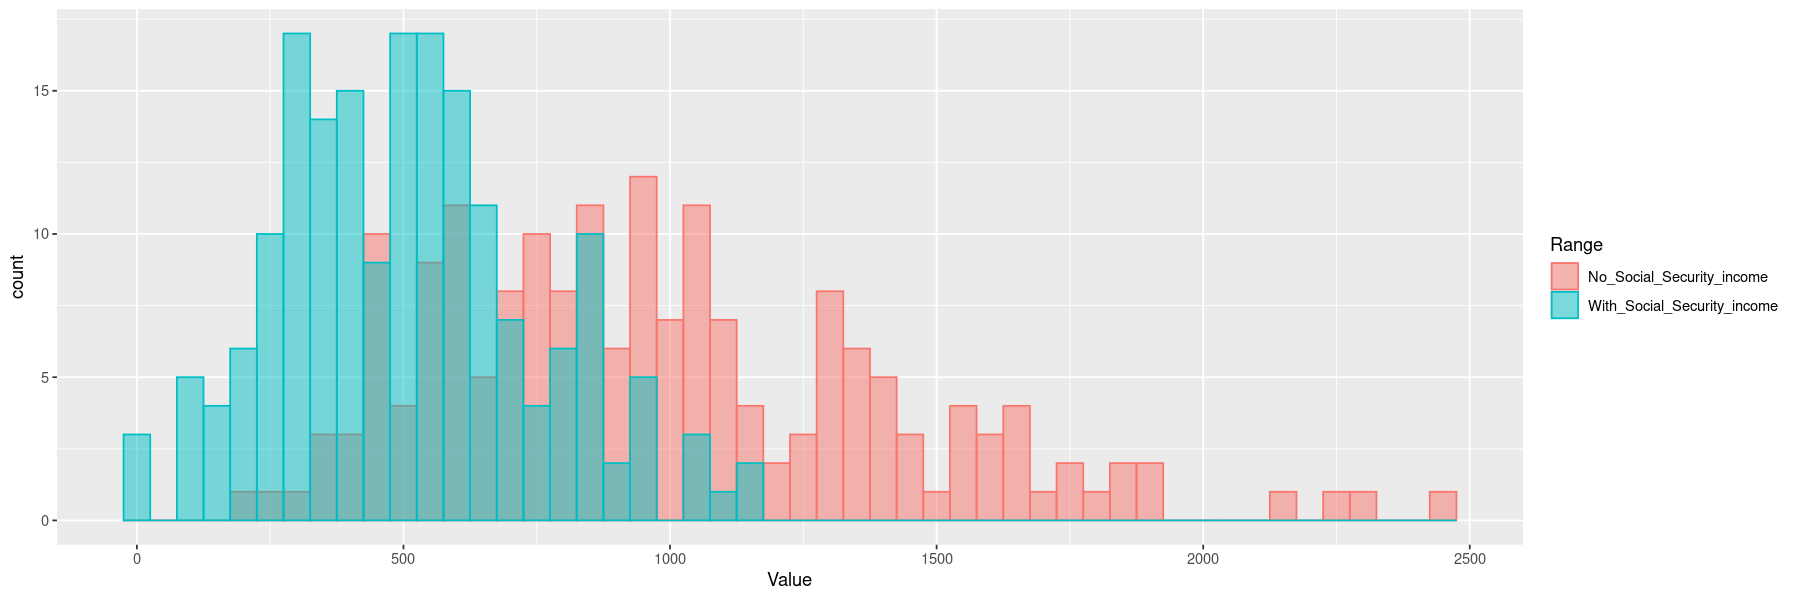

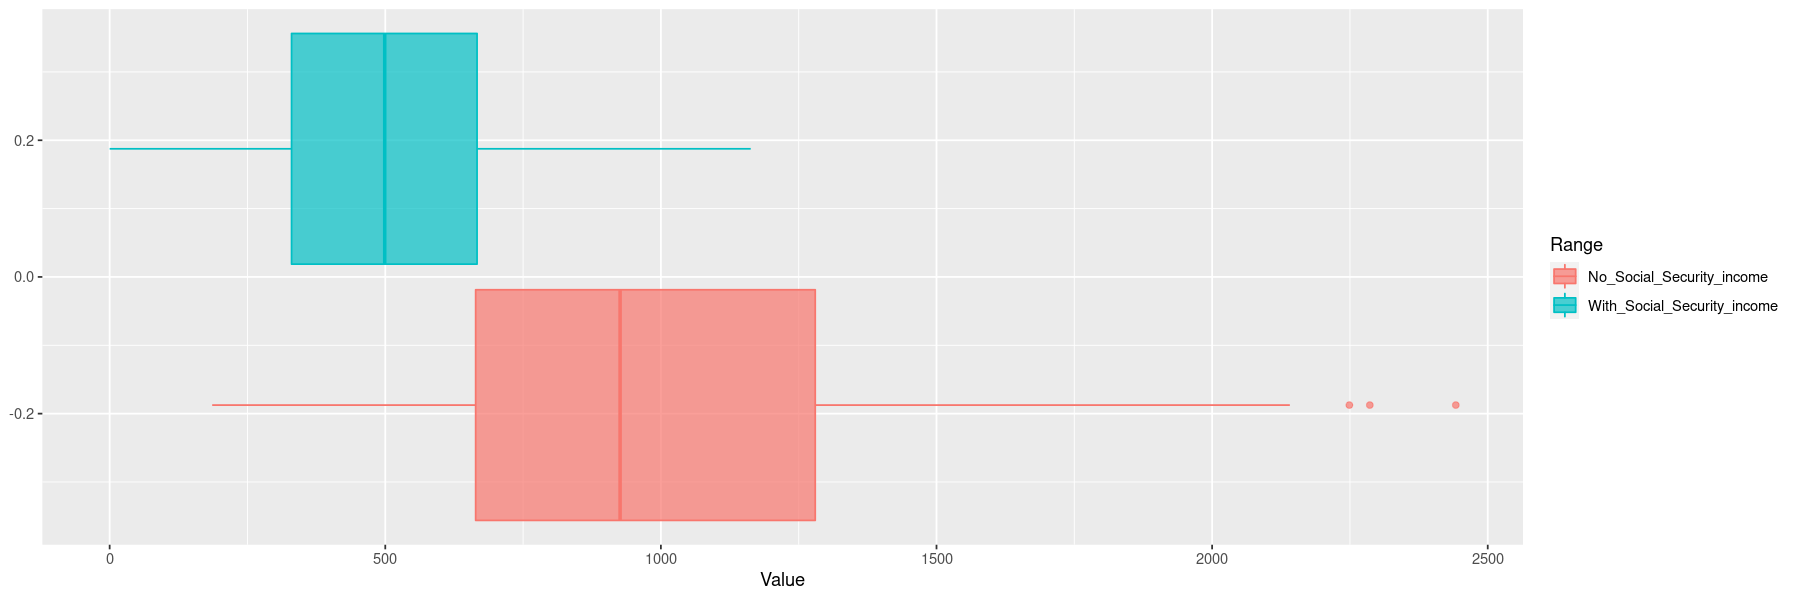

In [64]:
ss_income_data$With_Social_Security_income <- as.numeric(gsub(",", "", ss_income_data$With_Social_Security_income))
ss_income_data$No_Social_Security_income <- as.numeric(gsub(",", "", ss_income_data$No_Social_Security_income))

ss_income_data %>%
    select(
        With_Social_Security_income,
        No_Social_Security_income
    ) %>% 
    gather(key = Range, value = Value) %>%
    ggplot(aes(x = Value, fill = Range, color = Range)) +
    geom_histogram(position = "identity", binwidth = 50, alpha = .5) +
    theme(legend.position = "right")

ss_income_data %>%
    select(
        With_Social_Security_income,
        No_Social_Security_income
    ) %>% 
    gather(key = Range, value = Value) %>%
    ggplot(aes(x = Value, fill = Range, color = Range)) +
    geom_boxplot(alpha = .7) +
    theme(legend.position = "right")


Warning message:
“Removed 24 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 24 rows containing non-finite values (stat_boxplot).”


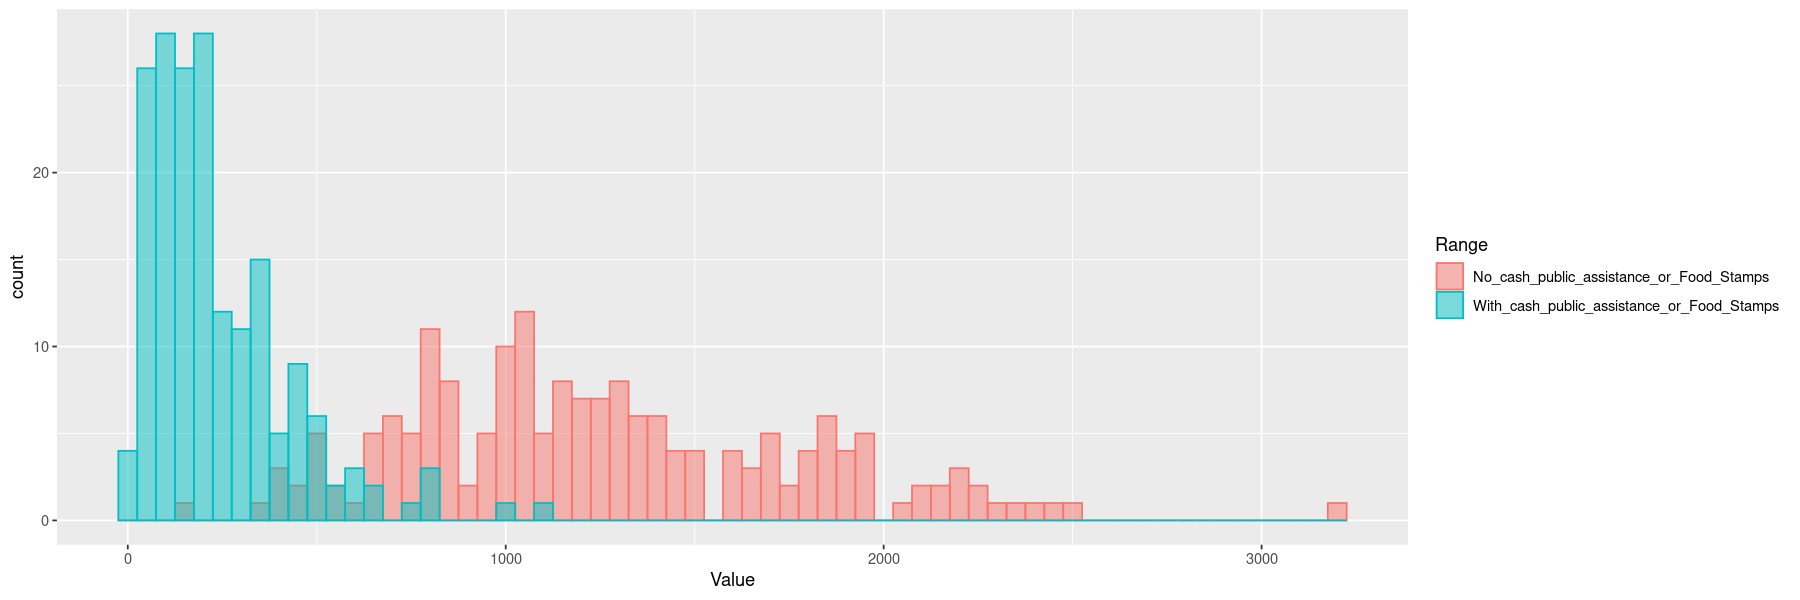

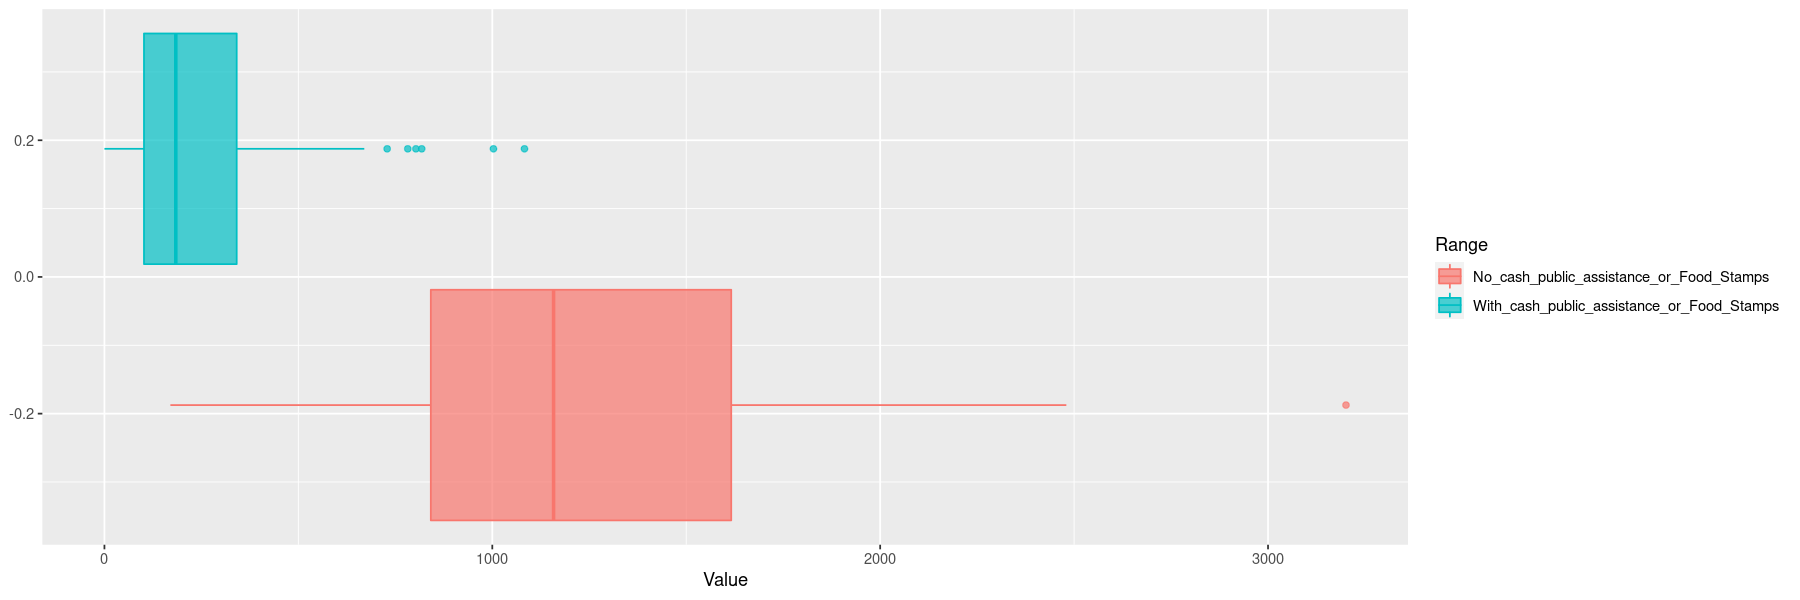

In [65]:
public_assistance_data$With_cash_public_assistance_or_Food_Stamps <- as.numeric(gsub(",", "", public_assistance_data$With_cash_public_assistance_or_Food_Stamps))
public_assistance_data$No_cash_public_assistance_or_Food_Stamps <- as.numeric(gsub(",", "", public_assistance_data$No_cash_public_assistance_or_Food_Stamps))

public_assistance_data %>%
    select(
        With_cash_public_assistance_or_Food_Stamps,
        No_cash_public_assistance_or_Food_Stamps
    ) %>%
    gather(key = Range, value = Value) %>%
    ggplot(aes(x = Value, fill = Range, color = Range)) +
    geom_histogram(position = "identity", binwidth = 50, alpha = .5) +
    theme(legend.position = "right")

public_assistance_data %>%
    select(
        With_cash_public_assistance_or_Food_Stamps,
        No_cash_public_assistance_or_Food_Stamps
    ) %>%
    gather(key = Range, value = Value) %>%
    ggplot(aes(x = Value, fill = Range, color = Range)) +
    geom_boxplot(alpha = .7) +
    theme(legend.position = "right")

In [66]:
naturalization_data

label,not_US_citizen,naturalized_citizen,naturalized_2015_or_later,naturalized_2010_to_2014,naturalized_2005_to_2009,naturalized_2000_to_2004,naturalized_1995_to_1999,naturalized_1990_to_1994,naturalized_before_1990,⋯,standardized_not_US_citizen,standardized_naturalized_citizen,standardized_naturalized_2015_or_later,standardized_naturalized_2010_to_2014,standardized_naturalized_2005_to_2009,standardized_naturalized_2000_to_2004,standardized_naturalized_1995_to_1999,standardized_naturalized_1990_to_1994,standardized_naturalized_before_1990,index
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Estimate,28,94,6,0,10,7,0,53,18,⋯,-0.48236366,-0.1360753,-0.37857496,-0.63210376,-0.2666852,-0.19815707,-0.52685529,4.42211976,-0.22583039,1.5754742
Estimate,132,8,1,6,0,0,0,0,1,⋯,0.08777329,-1.0671850,-0.54321188,-0.43576715,-0.5439771,-0.56603998,-0.52685529,-0.44181079,-1.01168986,-5.0487638
Estimate,486,31,4,0,0,0,18,5,4,⋯,2.02843174,-0.8181673,-0.44442973,-0.63210376,-0.5439771,-0.56603998,0.28600716,0.01705059,-0.87300877,-1.5462372
Estimate,571,194,18,10,8,36,111,0,11,⋯,2.49440905,0.9466105,0.01655366,-0.30487607,-0.3221436,1.32592926,4.48579650,-0.44181079,-0.54941958,7.6510490
Estimate,545,128,0,82,15,0,7,0,24,⋯,2.35187481,0.2320379,-0.57613926,2.05116329,-0.1280392,-0.56603998,-0.21074212,-0.44181079,0.05153177,2.7638364
Estimate,729,141,18,29,4,11,33,7,39,⋯,3.36057864,0.3727870,0.01655366,0.31685654,-0.4330603,0.01206174,0.96339254,0.20059514,0.74493718,5.5547021
Estimate,"1,266",448,186,74,61,21,22,22,62,⋯,6.30445883,3.6966323,5.54835426,1.78938114,1.1475038,0.53760874,0.46664326,1.57717925,1.80815880,22.8759204
Estimate,142,19,0,0,0,3,0,0,16,⋯,0.14259415,-0.9480896,-0.57613926,-0.63210376,-0.5439771,-0.40837587,-0.52685529,-0.44181079,-0.31828445,-4.2530420
Estimate,22,74,8,0,0,0,0,47,19,⋯,-0.51525617,-0.3526124,-0.31272019,-0.63210376,-0.5439771,-0.56603998,-0.52685529,3.87148611,-0.17960337,0.2423178
